In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle

In [3]:
import sys
sys.path.append("../")

In [4]:
import editdistance as ed
import utils.hierarcical_utils as hu

In [5]:
arrays = pickle.load(open("../../data/clostr_res/arrays_110", 'rb'))
cl_to_n = pickle.load(open("../../data/clostr_res/110_cl_to_n", 'rb'))
n_to_cl_full = pickle.load(open("../../data/clostr_res/n_to_cl_110", 'rb'))
gr = np.load("../../data/clostr_res/110.npy")

In [6]:
with open("../../data/clostr_06_07/ref_spacers.txt", 'w') as f:

    for item in cl_to_n.items():
        f.write(str(item[1]) + ' : ' + str(item[0])+"\n")

In [7]:
cl_to_n_full = {}
for item in n_to_cl_full.items():
    cl_to_n_full[item[1]] = item[0]

In [8]:
with open("../../data/answers/Clo_009089.txt", 'r') as f:
    lines1 = [x[:-2] for x in f.readlines()]
with open("../../data/answers/Clo_013316.txt", 'r') as f:
    lines2 = [x[:-2] for x in f.readlines()]

In [9]:
lines2[0].split(',')

['NC_013316_10',
 'TCTCCATCTCCAATTAACATAAATAATTCATCCGCTG',
 'CCGCTTGGCAAATCATAAGAAGGATTATTTTCTCCAAC',
 'AAAATAAAAGAGTTTGAATTACCCATTTTTTCATG',
 'TACGACATTGAATAAAATGGGTACAGAGACAATTTATAA',
 'TTTATAAATCTTTTAATGACTGTCTCTGATGGTACAG',
 'AAAGGAATAGATGATATGATTGCTAATGCTGAACAACAA',
 'GGGTCTGACTTTAATATATATATATATATATATAAATT',
 'TTATAAACTCCCACGACAAAATTAACTATAACCTCGT',
 'AGTTTTAAAGAGGGCAGACCTAAAAAATATACTAAAA',
 'GCAGAAGATTTAGCGACTGTTGTTGCTGAATGGGATG',
 'ATTAAATTGCTCAGTCTAGTACTTAAAGAATTATAAG',
 'TTGCTATGATTTAATTATACGACGTTTTGTCTTTAAAG',
 'TGCTGTGCCACAATTTGATGCTTCTATAGCTAAATTC',
 'CTTTTAAGTGCATCAAAGGAGTTACAAGCTATATTT']

In [10]:
repeat = 'GTTTTATATTAACTAAGTGGTATGTAAAT'
repeat1 = "GTTTTATATTAACTAAGTGGTATGTAAAG" 
ed.eval(repeat, repeat1)

1

In [11]:
array = repeat + repeat.join(lines1[0].split(',')[1:]) + repeat

In [12]:
hu.find_closest(cl_to_n, array[1])

(32, 'GACTTATTTACAGCTTTATTTGCTAAATCAGAA')

In [13]:
array

'GTTTTATATTAACTAAGTGGTATGTAAATCTAGAATTAGAACTCATTATTAAAACCATTCTTGCAGTTTTATATTAACTAAGTGGTATGTAAATTAATCTGACACATACAAAGTTGAACCTAGTGGTACGGTTTTATATTAACTAAGTGGTATGTAAATAAAAGCGTTCTTAAATCGTTACTTAACTCTTGCAAAGTTTTATATTAACTAAGTGGTATGTAAATTGGTATATCATACTCGTGCATTGCCTGCTCCACATTGTTTTATATTAACTAAGTGGTATGTAAATATACAACCATATATTTACCAATTATGTACTTATGAAGTTTTATATTAACTAAGTGGTATGTAAATTTTTTTAACTTTTCAGTTCTCACAGGCGTTTCATCGTTTTATATTAACTAAGTGGTATGTAAATTTCATATTCCAAGCGTTTTGCTTACACTTAATAGAAGTTTTATATTAACTAAGTGGTATGTAAATAAAATTAAATTTCATGCTCTTAGACATACATATGCAGTTTTATATTAACTAAGTGGTATGTAAATTAGATTGCTTTCAAATTACCTCTTGTATAGCGTCTGTTTTATATTAACTAAGTGGTATGTAAATTTGCTCCGCTATGCCTTGCGCTCTCTAATATCGCTTGTTTTATATTAACTAAGTGGTATGTAAATTGAACTTTAATCGGTTTTATACAACAATATAACGGTTTTATATTAACTAAGTGGTATGTAAATTCACACATGAGCAATATCGAAACAGGCAAATCTACAGTTTTATATTAACTAAGTGGTATGTAAATTTCGTAAAATAACAATTATCTGGAATATGAGAAGTTGTTTTATATTAACTAAGTGGTATGTAAATCACTCTTAAGTTGTGACCTATCTGATATATGATTAAGTTTTATATTAACTAAGTGGTATGTAAATTCAATATCTATATTAAGTTTATTTTTAAAAACATGTTTTATATTAACTAAGTGGTATGTAAAT'

In [14]:
curr = [cl_to_n[hu.find_closest(cl_to_n, x)[1]] for x in array.split(repeat)]

In [15]:
curr

[168, 72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8, 168]

In [16]:
def get_w(arr, gr):
    w = []
    for a,b in zip(arr, arr[1:]):
        w.append(gr[a][b])
    return w

In [17]:
arrays[-6]

[131, 132, 200, 28, 181]

In [18]:
answ_1 = [[cl_to_n[hu.find_closest(cl_to_n, x)[1]] for x in y.split(',')[1:]] for y in lines1]

In [19]:
answ_2 = [[cl_to_n[hu.find_closest(cl_to_n, x)[1]] for x in y.split(',')[1:]] for y in lines2]

In [63]:
import utils.viz_utils as vu
import utils.hamiltonian_utils as hamu
from importlib import reload
vu = reload(vu)
hamu = reload(hamu)

In [60]:
arrays, weights = hamu.restore_arrays(np.load("../../data/graphs/clostridium_1_3_answ.npy"), 0)

In [22]:
arrays_mask = [np.median(x) > 10 for x in weights]

In [23]:
arrays_masked = np.array(arrays)[arrays_mask]
weights_masked = np.array(weights)[arrays_mask]

In [59]:



answ_1_gr = vu.arrays_to_gr(answ_1)
answ_2_gr = vu.arrays_to_gr(answ_2)
pos = vu.prepare_pos(answ_1 + answ_2, shift_y=2)[0]

#arrays_gr = vu.arrays_to_gr(arrays_masked)
arrays_gr = vu.adj_to_gr(np.load("../../data/graphs/clostridium_1_3_answ.npy"))


In [64]:
shift_pos = vu.create_shift_pos(pos)
shift_pos = vu.add_pos(vu.gr_to_pairs(np.load("../../data/graphs/clostridium_1_3_answ.npy")), shift_pos)

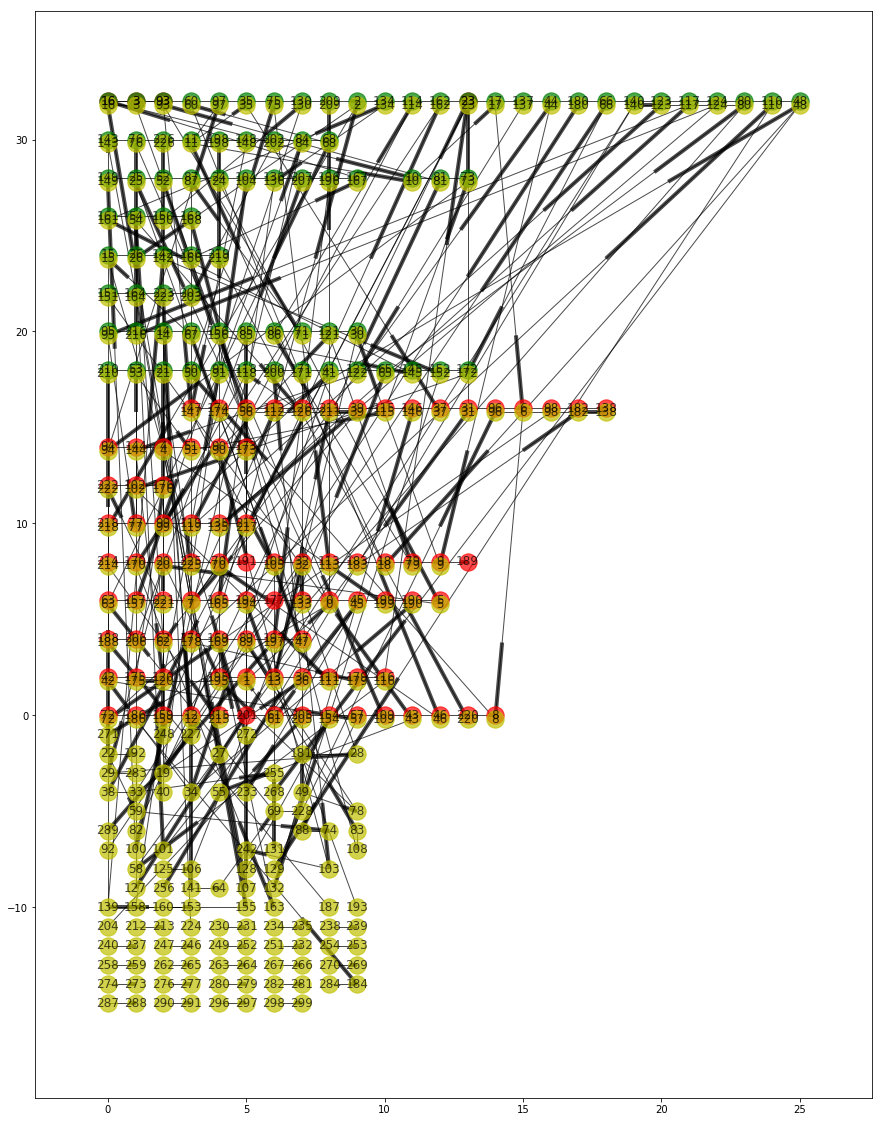

In [65]:
f = vu.plot_graphs(answ_1_gr, pos, answ_2_gr, pos, arrays_gr, shift_pos, node_size=300, figsize=(15, 20))

In [ ]:
'TTACTAAACATCTTATAACTTCTCTGAGAGCCTCTAG' 'AGAGGCAACTAATTGCTTATGAGTCTGCTAGTCTTA'

In [151]:
cl_to_n

{'TGACTCGTGCTATTTTTTTTACACGCCTAAGAGGTA': 0,
 'CTATCAATATATATTTTATAAGCATAAGTTTTACGCAT': 1,
 'CATTGTATACTAAGCTTGATATAGTGCAAAATGAAAC': 2,
 'CATATTATTAAAATATCACTATTCTATATAAAATT': 3,
 'TATACTTCCTAATGCAATCAAATAAGTACCTAAAAT': 4,
 'AACAAAAAAGATACATCTGTAACTAATTTTTATAC': 5,
 'ACGATATTTTTATATTCTATTGTTGTTATCTTATTC': 6,
 'ACATTATCAACATCATCTAATTTTTTTGTCACTGTA': 7,
 'TCAATATCTATATTAAGTTTATTTTTAAAAACATCT': 8,
 'CTTTTTCCGAAAAACCATTACTTACAAAATCTACA': 9,
 'TTTTACTTTTCCTTTCTATGTGTCCAATTCGGACACAT': 10,
 'AATAAAAAAGGTATAGTTTTCTTCTTAGTTACTGCCA': 11,
 'TGGTATATCATACTCGTGCATTGCCTGCTCCACATT': 12,
 'AACAACGTCATATATATCATCTTTAGTTGTAAGAGCA': 13,
 'ACGAAATTAGAGTTTGAAATATATGACTACATAATA': 14,
 'GTTGTAAGAAGTATCATTCTATTTTTTAATCTTTCT': 15,
 'TTTAGAAACAACAGAATAAACATAATATATAAGCATA': 16,
 'AGTAATTCCATGCAATCTTTTATATTGCTTTTTAACC': 17,
 'GAGGAGATTCAGACAGCGACTAAAAAGACTGATATAAA': 18,
 'AAACAACCATATATTTAACAATTATATACATAATAA': 19,
 'TGGTGAACAATAAAACAATCATCTAAAGACGAAGAAAA': 20,
 'AAAATAAAAGAGTTTGAATTACCCATTTTTTCAT': 21,
 'TTATATTAAT

In [148]:
ed.eval('TGGTGAACAATAAAACAATCATCTAAAGACGAAGAAAA',  'GAAGAACAATAAAACAATCATCTAAACACGAAGAA')

6

In [147]:
cl_to_n

{'TGACTCGTGCTATTTTTTTTACACGCCTAAGAGGTA': 0,
 'CTATCAATATATATTTTATAAGCATAAGTTTTACGCAT': 1,
 'CATTGTATACTAAGCTTGATATAGTGCAAAATGAAAC': 2,
 'CATATTATTAAAATATCACTATTCTATATAAAATT': 3,
 'TATACTTCCTAATGCAATCAAATAAGTACCTAAAAT': 4,
 'AACAAAAAAGATACATCTGTAACTAATTTTTATAC': 5,
 'ACGATATTTTTATATTCTATTGTTGTTATCTTATTC': 6,
 'ACATTATCAACATCATCTAATTTTTTTGTCACTGTA': 7,
 'TCAATATCTATATTAAGTTTATTTTTAAAAACATCT': 8,
 'CTTTTTCCGAAAAACCATTACTTACAAAATCTACA': 9,
 'TTTTACTTTTCCTTTCTATGTGTCCAATTCGGACACAT': 10,
 'AATAAAAAAGGTATAGTTTTCTTCTTAGTTACTGCCA': 11,
 'TGGTATATCATACTCGTGCATTGCCTGCTCCACATT': 12,
 'AACAACGTCATATATATCATCTTTAGTTGTAAGAGCA': 13,
 'ACGAAATTAGAGTTTGAAATATATGACTACATAATA': 14,
 'GTTGTAAGAAGTATCATTCTATTTTTTAATCTTTCT': 15,
 'TTTAGAAACAACAGAATAAACATAATATATAAGCATA': 16,
 'AGTAATTCCATGCAATCTTTTATATTGCTTTTTAACC': 17,
 'GAGGAGATTCAGACAGCGACTAAAAAGACTGATATAAA': 18,
 'AAACAACCATATATTTAACAATTATATACATAATAA': 19,
 'TGGTGAACAATAAAACAATCATCTAAAGACGAAGAAAA': 20,
 'AAAATAAAAGAGTTTGAATTACCCATTTTTTCAT': 21,
 'TTATATTAAT

In [169]:
f.savefig("../../data/clostr_06_07/110_fin_pic.pdf")

In [110]:
gr[81]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

search 200

In [26]:
import pandas as pd

In [27]:
complementary_table = pd.read_csv("../../data/complementary_table", index_col=0)

In [28]:
def compare_strings(a, b, c_table = complementary_table):
    mistakes = 0
    for ca, cb in zip(a,b):
        mistakes += 1 - c_table[ca][cb]
    return mistakes

In [43]:
c_dict = {}
for a in complementary_table.columns:
    for b in complementary_table.columns:
        c_dict[(a, b)] = 1 - complementary_table[a][b]

In [44]:
def compare_strings1(a, b, c_dict):
    mistakes = 0
    for ca, cb in zip(a,b):
        mistakes += c_dict[(ca, cb)]
    return mistakes

In [69]:
def search_string(b,a, c_dict = c_dict):
    found = -1
    mt = len(b)
    for i in range(len(b) - len(a)):
        t = compare_strings1(a, b[i:i+len(a)], c_dict)
        #print( b[i:i+len(a)], t)
        if t < mt:
            mt = t
            found = i
    return found, mt

In [52]:
lost_spacer = 'CATATTATTAATTTATAAATATTATATCTAATATT'
#lost_spacer = 'ANTATATGGAATG'

In [53]:
file = open("../../data/clostr_06_07/good_1-10_R1_raw.fastq") 

In [54]:
all_found = []

In [57]:
with open("../../data/clostr_06_07/good_1-10_R1_raw.fastq") as f:
    big_lines = f.readlines()

In [61]:
big_lines_cut = [x[:-2] for x in big_lines[1::4]]

In [70]:
from tqdm import tqdm_notebook

In [166]:
lost_spacer = 'gggtctgactttaatatatatatatatata'
lost_spacer = lost_spacer.swapcase()

In [191]:
lost_spacer = 'GGGTCTGACTTTAATATATATATATATATATATAAATT'

In [167]:
def search(x):
    return search_string(x, lost_spacer)

In [168]:
import multiprocessing as mp

In [192]:
pool = mp.Pool(6)

In [193]:
res = pool.map(search, big_lines_cut[:], chunksize=100)

In [194]:
len(res)

1916821

In [195]:
res = np.array(res)

In [196]:
res1 = np.array([x[1] for x in res])

In [197]:
np.sum(res1 < 7)

1

In [102]:
with open("../../data/clostr_06_07/good_1-10_R1_06_07pairsq10.txt") as f:
    pairs = [x[:-2].split(" ") for x in f.readlines()]

In [103]:
pairs[0]

['AAAGGTGACCATTGATTTCTTTCAGTTTCGGGAATA',
 'TGTTTTCCATAAACATTTCTAATTGACTTTTATTGT']

In [112]:
lost_spacer_73 = 'TGGTATATCATATTCGTGCATTTAATGCTAAAAATT'

In [113]:
for p in pairs:
    if ed.eval(lost_spacer_73, p[0]) <= 3 or ed.eval(lost_spacer_73, p[1]) <= 3:
        print(p)

['TGGTATATCATATTCGTGCATTTAATGCTAAAAATT', 'ATACAACAATATATTTAACAATTATGTAATTATGAA']


In [106]:
gr[:, 200]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       36.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1

In [152]:
ed.eval([x.split(',')[1:] for x in lines1][4][2], "GAAGAACAATAAAACAATCATCTAAACACGAAGAA")

3

In [153]:
arrays_masked

array([list([138, 182, 98, 6, 96, 31, 37, 146, 115, 39, 211, 126, 112, 56, 174, 147, 93]),
       list([72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8]),
       list([173, 90, 51, 4, 144, 94]), list([176, 102, 222]),
       list([42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116]),
       list([189, 9, 79, 18, 183, 113, 32, 105, 191, 70, 225, 141, 170, 214]),
       list([149, 25, 52, 87, 24, 104, 136, 207, 196, 167, 16, 10, 81]),
       list([217, 135, 119, 99, 77, 218]),
       list([63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5]),
       list([188, 206, 62, 178, 169, 89, 197, 47]),
       list([48, 110, 80, 124, 117, 123, 140, 66, 180, 44, 137, 17, 23, 162, 114, 134, 2, 209, 130, 75, 35, 97, 60]),
       list([15, 26, 142, 166, 219]),
       list([95, 216, 14, 67, 156, 85, 86, 71, 121, 30]),
       list([161, 54, 150, 168]), list([171, 41, 122, 65, 145, 152, 172]),
       list([210, 53, 21, 50, 91, 118]), list([88, 128]),
       list([151, 164, 223, 203]),

In [145]:
cl_to_n

{'TGACTCGTGCTATTTTTTTTACACGCCTAAGAGGTA': 0,
 'CTATCAATATATATTTTATAAGCATAAGTTTTACGCAT': 1,
 'CATTGTATACTAAGCTTGATATAGTGCAAAATGAAAC': 2,
 'CATATTATTAAAATATCACTATTCTATATAAAATT': 3,
 'TATACTTCCTAATGCAATCAAATAAGTACCTAAAAT': 4,
 'AACAAAAAAGATACATCTGTAACTAATTTTTATAC': 5,
 'ACGATATTTTTATATTCTATTGTTGTTATCTTATTC': 6,
 'ACATTATCAACATCATCTAATTTTTTTGTCACTGTA': 7,
 'TCAATATCTATATTAAGTTTATTTTTAAAAACATCT': 8,
 'CTTTTTCCGAAAAACCATTACTTACAAAATCTACA': 9,
 'TTTTACTTTTCCTTTCTATGTGTCCAATTCGGACACAT': 10,
 'AATAAAAAAGGTATAGTTTTCTTCTTAGTTACTGCCA': 11,
 'TGGTATATCATACTCGTGCATTGCCTGCTCCACATT': 12,
 'AACAACGTCATATATATCATCTTTAGTTGTAAGAGCA': 13,
 'ACGAAATTAGAGTTTGAAATATATGACTACATAATA': 14,
 'GTTGTAAGAAGTATCATTCTATTTTTTAATCTTTCT': 15,
 'TTTAGAAACAACAGAATAAACATAATATATAAGCATA': 16,
 'AGTAATTCCATGCAATCTTTTATATTGCTTTTTAACC': 17,
 'GAGGAGATTCAGACAGCGACTAAAAAGACTGATATAAA': 18,
 'AAACAACCATATATTTAACAATTATATACATAATAA': 19,
 'TGGTGAACAATAAAACAATCATCTAAAGACGAAGAAAA': 20,
 'AAAATAAAAGAGTTTGAATTACCCATTTTTTCAT': 21,
 'TTATATTAAT

In [146]:
ed.eval("TGGTGAACAATAAAACAATCATCTAAAGACGAAGAAAA","GAAGAACAATAAAACAATCATCTAAACACGAAGAA")

6

In [144]:
gr[88][128]

1106.0

In [112]:
pos = {0: (0,0)}

In [116]:
barrays = [[0,1]]

In [117]:
vu.add_pos(barrays, pos)

{0: (0, 0), 1: (0, -1)}

In [130]:
gr[141][170]

152.0

In [127]:
arrays

[[138, 182, 98, 6, 96, 31, 37, 146, 115, 39, 211, 126, 112, 56, 174, 147, 93],
 [72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8],
 [173, 90, 51, 4, 144, 94],
 [176, 102, 222],
 [42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116],
 [189, 9, 79, 18, 183, 113, 32, 105, 191, 70, 225, 141, 170, 214],
 [149, 25, 52, 87, 24, 104, 136, 207, 196, 167, 16, 10, 81],
 [217, 135, 119, 99, 77, 218],
 [63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5],
 [188, 206, 62, 178, 169, 89, 197, 47],
 [48,
  110,
  80,
  124,
  117,
  123,
  140,
  66,
  180,
  44,
  137,
  17,
  23,
  162,
  114,
  134,
  2,
  209,
  130,
  75,
  35,
  97,
  60],
 [15, 26, 142, 166, 219],
 [95, 216, 14, 67, 156, 85, 86, 71, 121, 30],
 [161, 54, 150, 168],
 [171, 41, 122, 65, 145, 152, 172],
 [210, 53, 21, 50, 91, 118],
 [88, 128],
 [151, 164, 223, 203],
 [68, 84, 202, 148, 198, 11, 226, 76, 143],
 [184, 29],
 [82, 58],
 [158, 101],
 [131, 132, 200, 28, 181],
 [73, 19],
 [38, 3],
 [40, 187],
 [74, 160]

In [79]:
ed.eval([x.split(',')[1:] for x in lines1][1][3], [x.split(',')[1:] for x in lines1][4][2])

3

In [132]:
ed.eval([x.split(',')[1:] for x in lines1][4][2], 'CTAGAATTAGAACTCATTATTAAAACCATTCTTGCAAG')

20

In [64]:
shift_pos[72]

(0, -0.2)

In [83]:
arrays[-9]

[184, 29]

In [47]:
weights[-10]

[269.0, 339.0, 147.0, 151.0, 66.0, 53.0, 49.0, 11.0]

In [100]:
hamu.search_best_alignment([141], answ_2, 0)

(('', ''), 7, (-1, -1, -1, -1))

In [195]:
n_to_cl = {}
for i in cl_to_n.items():
    n_to_cl[i[1]] = i[0]

In [200]:
n_to_cl[200]

'CATATTATTAATTTATAAATATTATATCTAATATT'

In [210]:
with open("../../data/clostr_06_07/good_1-10_R2_06_07pairsq10.txt") as f:
    pairs = [x[:-2].split(" ") for x in f.readlines()]

In [214]:
for p in pairs:
    if ed.eval(p[0], n_to_cl[200]) < 7 or  ed.eval(p[1], n_to_cl[200]) < 7:
        print(p, ed.eval(p[0], n_to_cl[200]), ed.eval(p[1], n_to_cl[200]))

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAGACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['TATCTAAAACCCAATAGGATTGACACGTTACGACCG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 22 6
['ACAAAAAAACGTATTATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAATATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCT', 'CATATTCTTCATT

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAATACGTATAATAAATATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 15 6
['ACAAAATAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCAATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACTTATAATAAAAATATTTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAATAAAAAGTATAATTAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATATTTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATATTAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAGTAAAAATAATTTCTATCTCCG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 18 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAATCGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAAAGTATAATAAAAATAATTTCTATCTCTT', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 15 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['AAGGTTTGACCTGCGTTTTTATATGCATCTGAATAAC', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAGAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTTATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTT', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTTTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTACAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 18 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAATACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAATACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAATACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACATAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTTTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 18 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCAATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['GCAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACGAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATGAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 18 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCAT

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['CCTGTATTCTGTTTAATGCTTCAATAGCTCTTTCTT', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGAATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACCTAAAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCAT

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTTTAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCAT

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['AGTAATTCCATGCAATCTTTTATATTGCTTTTTAGCCT', 'CATATTCTTC

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTTTAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTAAAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTCTAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAATAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTT', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTTTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCAT

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCAT

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAATAAAACGTATATTTAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTTTATCTAATATT'] 15 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATTAATATTATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATT

['ACAAAAAAACGTTTAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['CTAGAATTAGAACTCATTATTAAAACCATTCTTGCAAG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 18 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAATCTTATAATATATTTAATTTCTATCTCTG', 'CATATTCTTCATTTATACCTATTCTATCTAATATT'] 15 5
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTC

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAGCGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGCATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATTTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCCATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 18 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCGATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCAT

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ATACAACCATATATTTACCAATTATGTACTTATGAAG', 'CATATTCTTCAT

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAAAAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAGTAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAGACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTTTAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATATTTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAAAGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['TCAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAGTAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACTAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAATACTTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTTTCACTATTCTATCTAATATT'] 15 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAACTAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 18 6
['ACAAAAAAACGTATAATAAAAATAATTCCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 18 6
['ACAAAAAAACGTATAATAAAACTAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 18 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAACTAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 18 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['CCAATTAAGTTACTAGATAAAAAAATAGAACAAATTA', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 15 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTAGAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 18 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATACTTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 18 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAATAACGTATAATAAAAATAATTCCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACTTATAATAAATATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 15 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCCG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 18 6
['ACAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCAT

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['AACAACGTCATATATATCATCTTTAGTTGTAAGAGCA', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 19 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAATAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCACTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATATTAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAGAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 18 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACGAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCGTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACTTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATGCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAGTAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAATCGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTA', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAAAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACTTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCAT

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['GCAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACTTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['GCAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['CGAAAAATCTAGGAAAAACTATTGTAAAAGCGTTTA', 'CATATTCTTCAT

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['TGGTGAACAATAAAACAATCATCTAAAGACGAAGAAAA', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 21 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTC

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTA', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['AGGTATACACCTTCTACTCTTGTAAGAGTACCATAAG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 21 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTT', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACTTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTT', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 16 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCA

['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['TGAAACAAAATGCTGATGCAAGAAAAGAAAGTATCCGT', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 23 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTCATTTATCCCTATTCTATCTAATATT'] 17 6
['ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG', 'CATATTCTTC

In [211]:
for p in pairs:
    if ed.eval(p[0], n_to_cl[200]) < 3 or  ed.eval(p[1], n_to_cl[200]) < 3:
        print(p)

In [220]:
cl_to_n[hu.find_closest(cl_to_n, 'ACAAAAAAACGTATAATAAAAATAATTTCTATCTCTG')[1]]

39

In [216]:
gr[:, 200].argmax()

39

In [218]:
gr[39].astype(int)

array([    0,     4,     0,     2,     0,     0,     1,     1,     0,
           0,     0,     0,     0,     2,     0,     0,     0,     0,
           0,     0,     3,     0,     0,     1,     0,     0,     0,
           0,     0,     0,     0,     4,     0,     0,     0,     1,
           5,     1,     0,     1,     0,     0,     0,     2,     0,
           1,     1,     1,     0,     0,     1,     0,     0,     1,
           0,     0,     3,     1,     0,     0,     1,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     1,
           0,     0,     0,     0,     0,     0,     0,     0,     1,
           0,     0,     0,     0,     0,     1,     0,     0,     0,
           0,     0,     0,     2,     4,     0,     2,     1,     5,
           0,     0,     0,     0,     0,     1,     0,     2,     0,
           0,     1,     1,     4,     1,     0,     0,     5,     1,
           2,     0,     0,     3,     2,     0,     0,     2,     0,
           1,     0,

# Structure

In [29]:
def bar(w):
    plt.bar(range(len(w)), w)

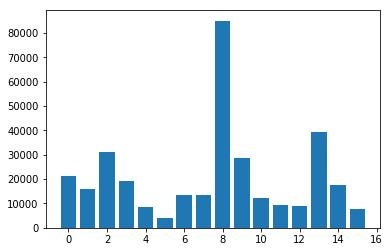

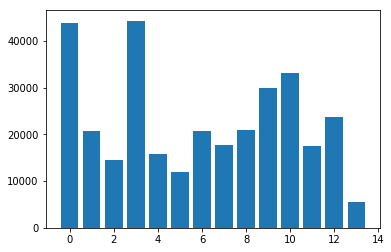

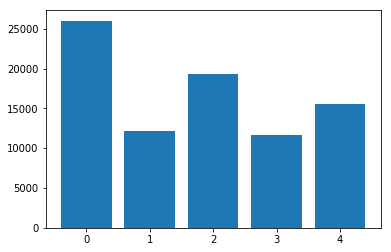

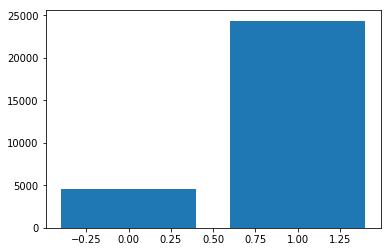

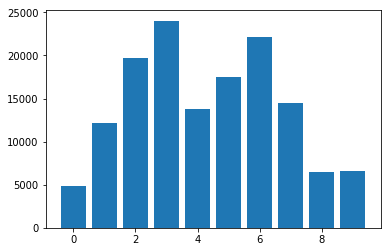

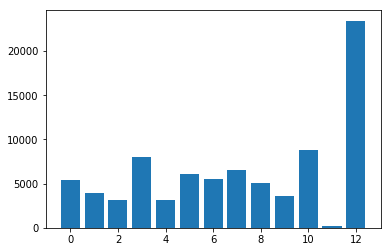

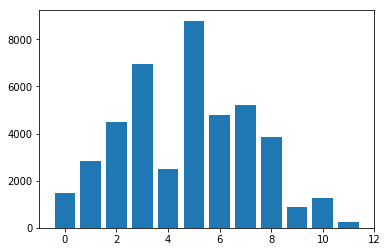

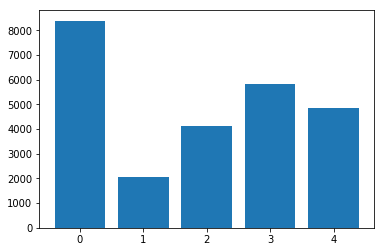

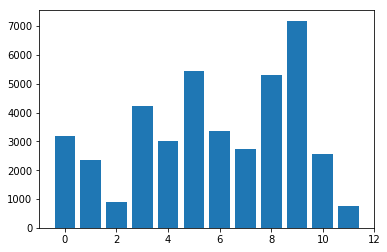

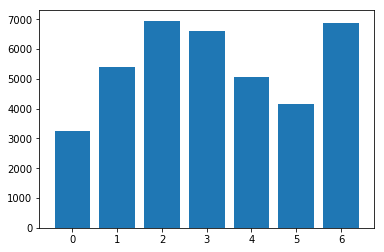

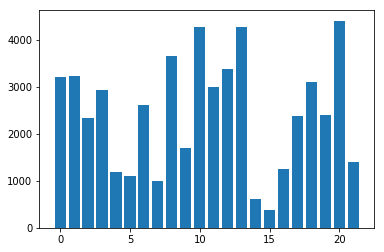

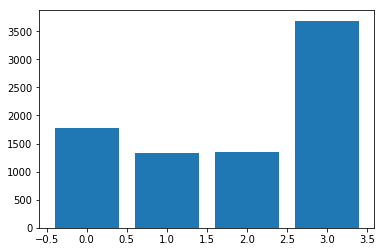

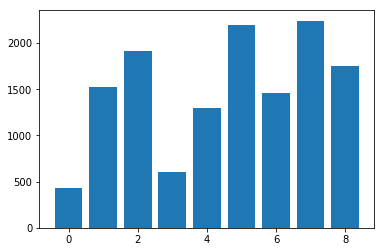

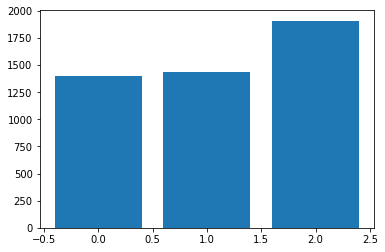

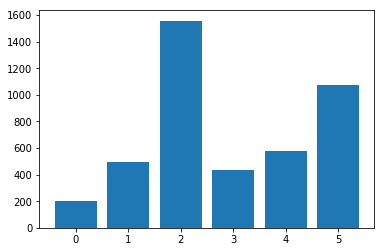

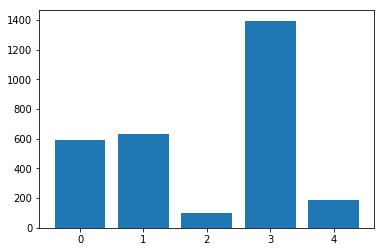

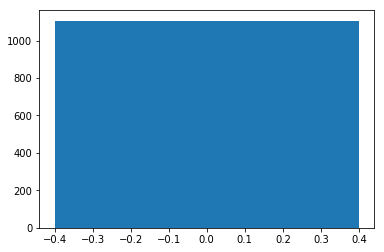

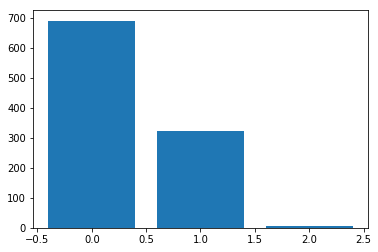

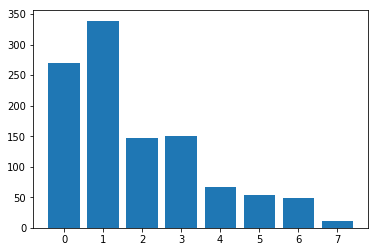

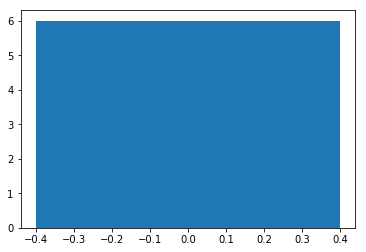

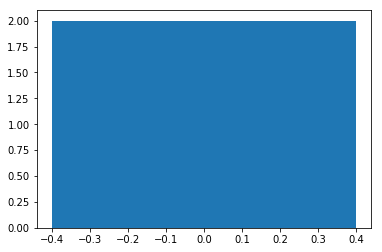

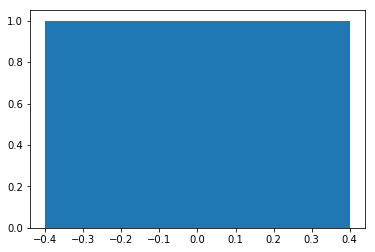

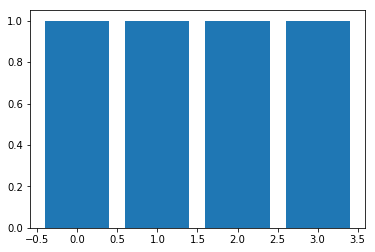

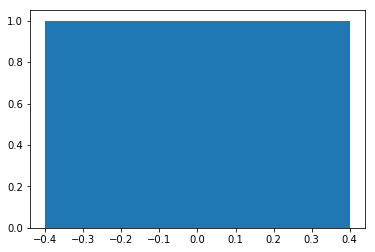

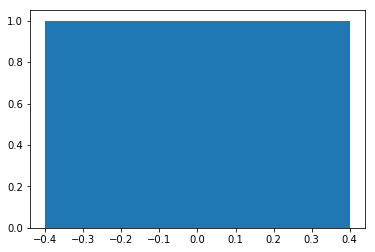

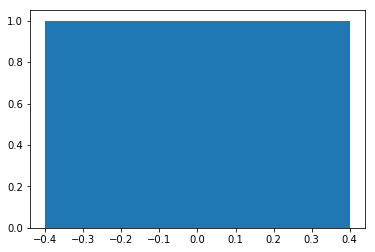

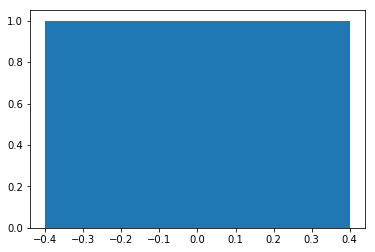

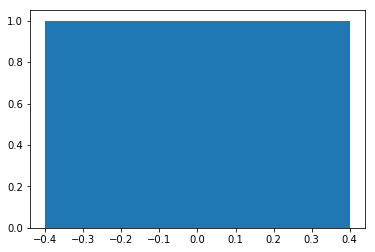

In [32]:
for w in weights:
    bar(w)
    plt.show()

In [228]:
arrays[ind]

[138, 182, 98, 6, 96, 31, 37, 146, 115, 39, 211, 126, 112, 56, 174, 147, 93]

In [231]:
hamu.search_best_alignment(arrays[ind], answ_1)

(([93, 147, 174, 56, 112, 126, 211, 39, 115, 146, 37, 31, 96, 6, 98, 182, 138],
  [16,
   3,
   93,
   147,
   174,
   56,
   112,
   126,
   211,
   39,
   115,
   146,
   37,
   31,
   96,
   6,
   98,
   182,
   138]),
 8,
 (0, 17, 0, 19))

In [253]:
spacers  = lines1[8].split(',')[1: ]

In [254]:
repeats = ['ATTTAGATATGATTTAGTTAATATAAGGT'] * (len(spacers) + 1)

In [245]:
repeats[1] = 'TTTTATATACTGCTTTATTAATATAAAAT'

In [246]:
repeats[2] = 'ACTTATCTACCACTTAGTTGATATAAAAC'

In [255]:
seq = ''
for r, s in zip(repeats, spacers):
    seq += r
    seq += s
seq += repeats[-1]

In [256]:
len(seq)

1274

In [257]:
seq

'ATTTAGATATGATTTAGTTAATATAAGGTTTGTAGAATCAACAATAGCATATACTAAAACATCCATTTAGATATGATTTAGTTAATATAAGGTAGAATATTAGCAATATCAACGAGTATTTAGAAACTTATTTAGATATGATTTAGTTAATATAAGGTAGGATAAAGAAAAGACTCACACAAGACACAGTGTCAGATTTAGATATGATTTAGTTAATATAAGGTTATCTAAAACCCAATAGGATTGACACGTTACGACCGATTTAGATATGATTTAGTTAATATAAGGTCCTGTATTCTGTTTAATGCTTCAATAGCTCTTTCTTATTTAGATATGATTTAGTTAATATAAGGTCAAAGTGCTAGGTCACTAAATGATGCAACAGTAGACGATTTAGATATGATTTAGTTAATATAAGGTTATCAAAAAATCCCCTCACCTGCATACTTATATAAATATTTAGATATGATTTAGTTAATATAAGGTTTTAAAAGGTCAACTTAAAGGTAGTAATTTTTTAATAATTTAGATATGATTTAGTTAATATAAGGTCATATTCTTCATTTATCCCTATTCTATCTAATATTTATTTAGATATGATTTAGTTAATATAAGGTACAAAAAAACGTATAATAAAAATAATTTCTATCTCTGATTTAGATATGATTTAGTTAATATAAGGTCCAATTAAGTTACTAGATAAAAAAATAGAACAAATTAATTTAGATATGATTTAGTTAATATAAGGTCGAATTTCATGGCTTTGAATTTATTTATATGTAGTTATTTAGATATGATTTAGTTAATATAAGGTTGAAACAAAATGCTGATGCAAGAAAAGAAAGTATCCGTATTTAGATATGATTTAGTTAATATAAGGTTCAAAATTATTTAGTTATACTAAACATTATATTATAATTTAGATATGATTTAGTTAATATAAGGTAGGTATACACCTTCTACTCTTGTAAGAGTACCATAAGATTTAGATATGATTTA

In [260]:
p = 0
for i,(a, b) in enumerate(zip([len(x) for x in repeats], [len(x) for x in spacers])):
    print(i, p)
    p += a + b

0 0
1 64
2 129
3 195
4 260
5 325
6 391
7 457
8 523
9 588
10 654
11 720
12 785
13 852
14 917
15 983
16 1049
17 1115
18 1181


In [130]:
structure = '..(((((((..(((((((((((((((((........(((((((((................)).))))))).....(((((((((((((((((.((((.((...((..(((.((...........((((...(((((((..(((((((((((((((((.....(((...((((........))))....))).....)))))))..)))))))))))))))))...))))...........)).)))..))...)).)))).)))))))..))))))))))..(((((((((......))))))))).....(((((..((((((..(((((((..(((((((((((((((((.(((.........((((...(((((.((..........(((((((..((((((((((((((((((((((((((((((((.....)))...........(((((((.((((..(((((((((((((((((..............(((((...)).)))......((((.(((((((..(((((((((((((((((.(((((.(((..(((........)))...)))))))).)))))))..))))))))))))))))).))))..(((........)))............((((((((((((((.((((((((((.((((....(((((......)))))..))))..(((((((.....))))))).))))))))))((((........))))....))))).)))))))))...........)))))))..))))))))))))))))))))).................))))))))))))......)))))))..)))))))))))))))))..........))))))).....)))).........))).)))))))..)))))))))))))))))))).)))..)))))...((((........))))....)))))))..))))))))))))))))).'

In [38]:
len(array)

998

In [39]:
len(structure)

998

In [41]:
array.split(repeat)

['',
 'CTAGAATTAGAACTCATTATTAAAACCATTCTTGCA',
 'TAATCTGACACATACAAAGTTGAACCTAGTGGTACG',
 'AAAAGCGTTCTTAAATCGTTACTTAACTCTTGCAAA',
 'TGGTATATCATACTCGTGCATTGCCTGCTCCACATT',
 'ATACAACCATATATTTACCAATTATGTACTTATGAA',
 'TTTTTTAACTTTTCAGTTCTCACAGGCGTTTCATC',
 'TTCATATTCCAAGCGTTTTGCTTACACTTAATAGAA',
 'AAAATTAAATTTCATGCTCTTAGACATACATATGCA',
 'TAGATTGCTTTCAAATTACCTCTTGTATAGCGTCT',
 'TTGCTCCGCTATGCCTTGCGCTCTCTAATATCGCTT',
 'TGAACTTTAATCGGTTTTATACAACAATATAACG',
 'TCACACATGAGCAATATCGAAACAGGCAAATCTACA',
 'TTCGTAAAATAACAATTATCTGGAATATGAGAAGTT',
 'CACTCTTAAGTTGTGACCTATCTGATATATGATTAA',
 'TCAATATCTATATTAAGTTTATTTTTAAAAACAT',
 '']

In [45]:
def find_substring(substring, string):
    """ 
    Returns list of indices where substring begins in string

    >>> find_substring('me', "The cat says meow, meow")
    [13, 19]
    """
    indices = []
    index = -1  # Begin at -1 so index + 1 is 0
    while True:
        # Find next index of substring, by starting search from index + 1
        index = string.find(substring, index + 1)
        if index == -1:  
            break  # All occurrences have been found
        indices.append(index)
    return indices

In [161]:
spacers_ind = np.array(find_substring(repeat, array))

NameError: name 'find_substring' is not defined

In [160]:
spacers_ind

NameError: name 'spacers_ind' is not defined

In [50]:
for ind in spacers_ind:
    print(structure[ind:ind+29])

..(((((((..(((((((((((((((((.
)))))).....(((((((((((((((((.
..(((((((..(((((((((((((((((.
..)))))))..))))))))))))))))).
).)))))))..))))))))))..((((((
..(((((((..(((((((((((((((((.
..(((((((..((((((((((((((((((
((((.((((..(((((((((((((((((.
(.(((((((..(((((((((((((((((.
).)))))))..))))))))))))))))).
((((((((((.((((((((((.((((...
...))))))).))))))))))((((....
..)))))))..))))))))))))))))))
..)))))))..))))))))))))))))).
).)))))))..))))))))))))))))))
..)))))))..))))))))))))))))).
